In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
from collections import defaultdict
from scipy.stats import multivariate_normal

In [3]:
class DPMM:
    def __init__(self, alpha, prior_mu, prior_cov, max_iter, num_c):
        self.alpha = alpha
        self.prior_mu = prior_mu
        self.prior_cov = prior_cov
        self.max_iter = max_iter
        self.num_c = num_c
        self.cluster_assignments = defaultdict(int)
        self.clusters = defaultdict(list)
    
    def fit(self, data):
        import warnings
        warnings.simplefilter("error")
        
        # Randomly Initialize each point as its own cluster
        n = data.shape[0]
        random_assignments = np.random.randint(0, self.num_c, data.shape[0])
        for i, assinment in enumerate(random_assignments):
            self.cluster_assignments[i] = assinment
            self.clusters[assinment].append(i)
        
        for i in xrange(self.max_iter):
            print i
            if i % 100 == 0:
                #self.plot_clusters(data)
                pass
                
            for point_num, point in enumerate(data):
                probabilities = []
                cluster_assignment = self.cluster_assignments[point_num]
                cluster_list = self.clusters[cluster_assignment]
                del cluster_list[cluster_list.index(point_num)]
                
                self.clusters[cluster_assignment] = cluster_list
                
                probabilities = []
                for cluster in xrange(len(self.clusters)):
                    cluster_list = self.clusters[cluster]
                    num_in_cluster = len(cluster_list)
                    if num_in_cluster == 0:
                        probabilities.append(0)
                        continue
                        
                    p_z = (1.0 * num_in_cluster) / (self.alpha + n - 1.0)
                
                    mu = np.mean(data[cluster_list], axis=0)
                    if num_in_cluster == 1:
                        cov = np.eye(2)
                    else:
                        cov = np.cov(data[cluster_list].T)
                    
                    try:
                        p_x = multivariate_normal(mu, cov).pdf(point)
                    except:
                        #print 'IN'
                        p_x = multivariate_normal(mu, np.eye(2)).pdf(point)
                    
                    probabilities.append(p_z * p_x)
                
                # probability of new cluster
                p_z = (self.alpha / (self.alpha + n - 1.))
                p_x = multivariate_normal(self.prior_mu, self.prior_cov).pdf(point)
                probabilities.append(p_z * p_x)
                
                probabilities = np.array(probabilities)
                #print probabilities
                probabilities /= probabilities.sum()
                #print probabilities
                cluster_assignment = np.argmax(np.random.multinomial(1, probabilities))
                
                self.clusters[cluster_assignment].append(point_num)
                self.cluster_assignments[point_num] = cluster_assignment
                
    
    def plot_clusters(self, data):
            colors = plt.cm.rainbow(np.linspace(0, 1, len(dpmm_model.clusters)))
            for color, cluster in zip(colors, self.clusters):
                cluster_list = dpmm_model.clusters[cluster]
                plt.scatter(data[cluster_list, 0], data[cluster_list, 1], c=color)
            
            plt.show()
                

In [4]:
n = 100
num_clusters = 2
prior_mu = np.zeros(2)
prior_cov  = 15.*np.eye(2)

In [5]:
cluster_centers = np.random.multivariate_normal(prior_mu, prior_cov, num_clusters)

[[-3.97518985 -0.40542362]
 [-3.00464821  8.1914871 ]]


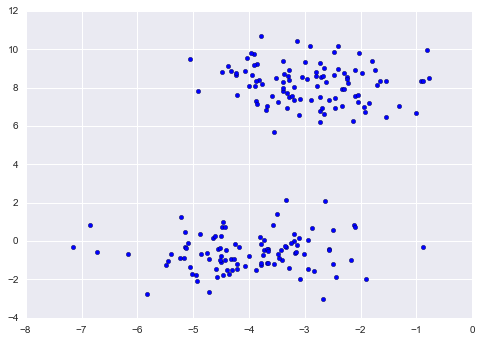

In [6]:
print cluster_centers

data = np.random.multivariate_normal(cluster_centers[0], np.eye(2), n)

for cluster in cluster_centers[1:]:
    new_data = np.random.multivariate_normal(cluster, np.eye(2), n)
    data = np.concatenate((data, new_data))

np.random.shuffle(data)
plt.scatter(data[:, 0], data[:, 1])

In [7]:
dpmm_model = DPMM(5.0, prior_mu, prior_cov, 100, 2)

In [8]:
dpmm_model.fit(data)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


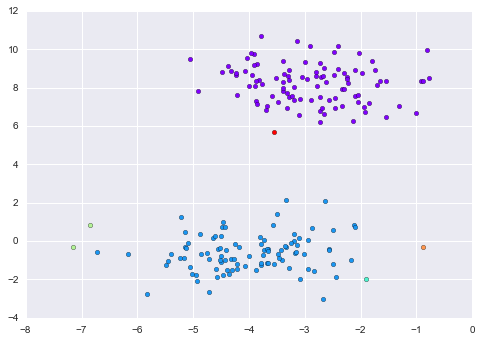

In [9]:
num_found_clusters = 0 
for cluster, c_l in dpmm_model.clusters.items():
    if len(c_l) > 0:
        num_found_clusters += 1

colors = plt.cm.rainbow(np.linspace(0, 1, num_found_clusters))

i = 0
for cluster, c_l in dpmm_model.clusters.items():
    if len(c_l) > 0:
        plt.scatter(data[c_l, 0], data[c_l, 1], c=colors[i])
        i += 1
   

In [10]:
n = 100
num_clusters = 4
prior_mu = np.zeros(2)
prior_cov  = 15.*np.eye(2)

[[ 4.26016721 -0.66183817]
 [ 8.64702036 -1.39432547]
 [-2.10248275  4.24556442]
 [-0.59633526 -1.24792706]]


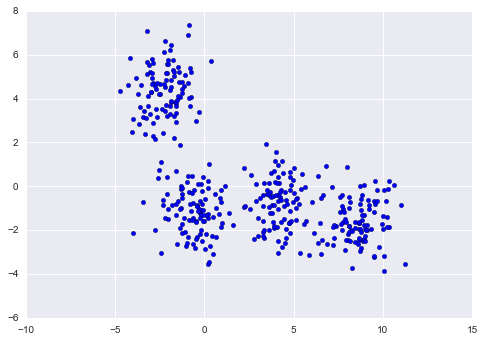

In [11]:
cluster_centers = np.random.multivariate_normal(prior_mu, prior_cov, num_clusters)
print cluster_centers

data = np.random.multivariate_normal(cluster_centers[0], np.eye(2), n)

for cluster in cluster_centers[1:]:
    new_data = np.random.multivariate_normal(cluster, np.eye(2), n)
    data = np.concatenate((data, new_data))

np.random.shuffle(data)
plt.scatter(data[:, 0], data[:, 1])

In [12]:
dpmm_model = DPMM(5.0, prior_mu, prior_cov, 100, 2)

In [13]:
dpmm_model.fit(data)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


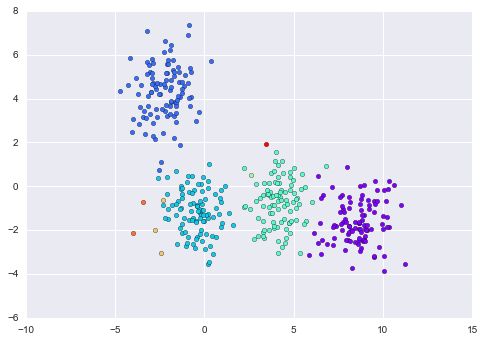

In [14]:
num_found_clusters = 0 
for cluster, c_l in dpmm_model.clusters.items():
    if len(c_l) > 0:
        num_found_clusters += 1

colors = plt.cm.rainbow(np.linspace(0, 1, num_found_clusters))

i = 0
for cluster, c_l in dpmm_model.clusters.items():
    if len(c_l) > 0:
        plt.scatter(data[c_l, 0], data[c_l, 1], c=colors[i])
        i += 1
   